In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 讀檔
data = pd.read_csv('/content/drive/MyDrive/大三/數析/NCU_JWD_2005_2015.csv', sep=',', header=0, index_col=None, encoding='ISO-8859-1')
data_ty = pd.read_csv('/content/drive/MyDrive/大三/數析/TY.csv', sep=',', names=['number', 'start', 'end'])
# print(data)
# print(data_ty)

time = np.array(data['TIME'])
x1 = np.array(data['RR(mm/hr)'])
y1 = np.array(data['dBZ'])
ty_number = np.array(data_ty['number'][::-1])
ty_start = np.array(data_ty['start'][::-1])
ty_end = np.array(data_ty['end'][::-1])
ty_time = np.zeros(2*ty_number.shape[0])
# print(time)
for i in range(ty_number.shape[0]):
    ty_time[2*i] = ty_start[i]
    ty_time[2*i+1] = ty_end[i]
# print(ty_start)
# print(ty_end)
# print(ty_time)

# 把雨量換成log10
x_log = np.log10(x1)

# 移除雷達資料為空白值者，並判斷颱風期間者，使用np.delete移除
ind_org = []
ind_not_ty = []
ind_ty = []
for i in range(len(time)):
    if y1[i] == -999:
        ind_org.append(i)
        ind_not_ty.append(i)
        ind_ty.append(i)
    if y1[i] != -999:
        for j in range(1, len(ty_number) - 1):
            # print('ty_time[0]', ty_time[0])
            # print('ty_time[j]', ty_time[2 * j + 1])
            # print('time[i]', time[i])
            # print('ty_time[j]', ty_time[2 * j + 2])
            # print('ty_time[-1]', ty_time[-1])
            # print('ty_time[j]', ty_time[j])
            if time[i] < ty_time[0] or ty_time[2*j+1] < time[i] < ty_time[2*j+2] or ty_time[-1] < time[i]:
                ind_not_ty.append(i)
                break
            if ty_time[2 * j] < time[i] < ty_time[2 * j + 1]:
                ind_ty.append(i)
                break
    # print()
# print('len(ind_x)', len(ind_x), '\nind_x', ind_x)
# print('len(ind)', len(ind), '\nind', ind)

# t_org = np.delete(time, ind_x)
# x_org = np.delete(x_log, ind_x)
# y_org = np.delete(y1, ind_x)

t_ty = np.delete(time, ind_not_ty)
x_ty = np.delete(x_log, ind_not_ty)
y_ty = np.delete(y1, ind_not_ty)

t_not_ty = np.delete(time, ind_ty)
x_not_ty = np.delete(x_log, ind_ty)
y_not_ty = np.delete(y1, ind_ty)

#random
df = pd.DataFrame({'time': t_ty, 'x': x_ty, 'y': y_ty})
train_t_ty, test_t_ty = train_test_split(df, random_state=777, train_size=0.7)
train_t_ty = train_t_ty.sort_index()
test_t_ty = test_t_ty.sort_index()

t_ty_train = np.array(train_t_ty['time'])
x_ty_train = np.array(train_t_ty['x'])
y_ty_train = np.array(train_t_ty['y'])

t_ty_test = np.array(test_t_ty['time'])
x_ty_test = np.array(test_t_ty['x'])
y_ty_test = np.array(test_t_ty['y'])

# DF = pd.DataFrame({'time': t_not_ty, 'x': x_not_ty, 'y': y_not_ty})
# train_t_not_ty, test_t_not_ty = train_test_split(DF, random_state=777, train_size=0.7)
# train_t_not_ty = train_t_not_ty.sort_index()
# test_t_not_ty = test_t_not_ty.sort_index()

# t_not_ty_train = np.array(train_t_not_ty['time'])
# x_not_ty_train = np.array(train_t_not_ty['x'])
# y_not_ty_train = np.array(train_t_not_ty['y'])

# t_not_ty_test = np.array(test_t_not_ty['time'])
# x_not_ty_test = np.array(test_t_not_ty['x'])
# y_not_ty_test = np.array(test_t_not_ty['y'])

ind3_4 = []
ind5_6 = []
ind7_9 = []
ind10_2 = []
for i in range(t_not_ty.shape[0]):
    # print(str(t_not_ty[i]))
    # print(str(t_not_ty[i])[4:6])
    if str(t_not_ty[i])[4:6] != '03' and str(t_not_ty[i])[4:6] != '04':
        # print('11111')
        ind3_4.append(i)
    if str(t_not_ty[i])[4:6] != '05' and str(t_not_ty[i])[4:6] != '06':
        # print('22222')
        ind5_6.append(i)
    if str(t_not_ty[i])[4:6] != '07' and str(t_not_ty[i])[4:6] != '08' and str(t_not_ty[i])[4:6] != '09':
        # print('33333')
        ind7_9.append(i)
    if str(t_not_ty[i])[4:6] != '10' and str(t_not_ty[i])[4:6] != '11' and str(t_not_ty[i])[4:6] != '12' \
            and str(t_not_ty[i])[4:6] != '01' and str(t_not_ty[i])[4:6] != '02':
        # print('44444')
        ind10_2.append(i)
    # print()
# print('x3.shape[0]', x3.shape[0])
# print('x2.shape[0]', x.shape[0])

# plt.scatter(x3, y3, s=1, label='origin', color='royalblue')
# plt.scatter(x, y, s=1, label='typhoon', color='lightskyblue')
# plt.show()

In [ ]:
#typhon random
# from sklearn.model_selection import train_test_split

# df = pd.DataFrame({'time': t_ty, 'x': x_ty, 'y': y_ty})
# train_t_ty, test_t_ty = train_test_split(df, random_state=777, train_size=0.7)
# train_t_ty = train_t_ty.sort_index()
# test_t_ty = test_t_ty.sort_index()

# t_ty_train = np.array(train_t_ty['time'])
# x_ty_train = np.array(train_t_ty['x'])
# y_ty_train = np.array(train_t_ty['y'])

# t_ty_test = np.array(test_t_ty['time'])
# x_ty_test = np.array(test_t_ty['x'])
# y_ty_test = np.array(test_t_ty['y'])


In [ ]:
def convertAB(slope, offset):
  #Covert slope and offset from log(R) v.s. dBZ regression to a and b const. of Z=aR**b
  print('a=', round(10**(offset/10), 1), 'b=', round(slope/10, 1))

def run(i, x, y, t, name, x_test, y_test, t_test):
    # 計算回歸所需數值
    n = t.shape[0]
    x_sum = sum(x)
    y_sum = sum(y)
    x2_sum = sum(x**2)
    y2_sum = sum(y**2)
    x3_sum = sum(x**3)
    x4_sum = sum(x**4)
    xy_sum = sum(x*y)
    x2y_sum = sum(x**2*y)

    # 線性回歸
    print('線性回歸')
    A_1 = np.array([[n, x_sum], [x_sum, x2_sum]])
    # print('A_1 =', A_1)
    B_1 = np.array([[y_sum], [xy_sum]])
    # print('B_1 =', B_1)
    A_1_inv = np.linalg.inv(A_1)
    # print('A_1_inv =', A_1_inv)
    ans_1 = A_1_inv.dot(B_1)
    # print('ans_1 =', ans_1)
    a0_1 = ans_1[0, 0]
    a1_1 = ans_1[1, 0]
    # print('a0 =', a0_1, '\na1 =', a1_1)
    st_1 = sum((y-np.mean(y))**2)
    sr_1 = sum((y-(a0_1 + a1_1 * x))**2)

    # standard error
    se_1 = np.sqrt(sr_1/(n-2))
    # correlation coefficient
    r_1 = np.sqrt((st_1-sr_1)/st_1)
    print('sr =', sr_1, '\nse =', se_1, '\nr =', r_1)

    # 線性回歸線
    xs = np.linspace(-2, 3, 100)
    ys_1 = a0_1 + a1_1 * xs
    print(f'Linear regression Line: y = {a1_1:.2f}x + {a0_1:.2f}')
    convertAB(a1_1, a0_1) #Add by Garry 23/12/18: Convert to Z=aR**b

    # 誤差---------------------------------------------------------------------------------------------------新增
    error1 = []
    error1_max = []
    for k in range(len(t_test)):
        error_sum = 0
        error_max = 0
        t_t = t_test[k]
        x_t = x_test[k]
        y_t = y_test[k]
        for j in range(t_t.shape[0]):
            if np.abs(y_t[j] - (a0_1 + a1_1 * x_t[j])) > error_max:
                error_max = np.abs(y_t[j] - (a0_1 + a1_1 * x_t[j]))
            error_sum += np.abs(y_t[j] - (a0_1 + a1_1 * x_t[j]))
        error = error_sum/t_t.shape[0]
        error1.append(error)
        error1_max.append(error_max)

    # 畫圖
    plt.scatter(x, y, s=0.1, color='lightskyblue')
    plt.plot(xs, ys_1, color='orange', label=f'Regression Line: y = {a1_1:.2f}x + {a0_1:.2f}',linewidth=1)
    plt.xlabel('RR(mm/hr)')
    plt.ylabel('dBZ')
    plt.title('period : ' + name[i])
    plt.legend()
    plt.grid()
    plt.show()

    # 二次回歸
    print('二次回歸')
    A_2 = np.array([[n, x_sum, x2_sum], [x_sum, x2_sum, x3_sum], [x2_sum, x3_sum, x4_sum]])
    B_2 = np.array([[y_sum], [xy_sum], [x2y_sum]])
    A_2_inv = np.linalg.inv(A_2)
    ans_2 = A_2_inv.dot(B_2)
    a0_2 = ans_2[0, 0]
    a1_2 = ans_2[1, 0]
    a2_2 = ans_2[2, 0]
    # print('a0 =', a0_2, '\na1 =', a1_2, '\na2 =', a2_2)

    st_2 = sum((y-np.mean(y))**2)
    sr_2 = sum((y-(a0_2 + a1_2 * x + a2_2 * x**2))**2)

    # standard error
    se_2 = np.sqrt(sr_2/(n-3))

    # correlation coefficient
    r_2 = np.sqrt((st_2-sr_2)/st_2)
    print('sr =', sr_2, '\nse =', se_2, '\nr =', r_2)

    # 二次回歸線
    ys_2 = a0_2 + a1_2 * xs + a2_2 * xs**2
    print(f'Polynomial regression Line: y = {a2_2:.2f}x^2 + {a1_2:.2f}x + {a0_2:.2f}')

    # 誤差---------------------------------------------------------------------------------------------------新增
    error2 = []
    error2_max = []
    for k in range(len(t_test)):
        error_sum = 0
        error_max = 0
        t_t = t_test[k]
        x_t = x_test[k]
        y_t = y_test[k]
        for j in range(t_t.shape[0]):
            if np.abs(y_t[j] - (a0_2 + a1_2 * x_t[j] + a2_2 * x_t[j]**2)) > error_max:
                error_max = np.abs(y_t[j] - (a0_2 + a1_2 * x_t[j] + a2_2 * x_t[j]**2))
            error_sum += np.abs(y_t[j] - (a0_2 + a1_2 * x_t[j] + a2_2 * x_t[j]**2))
        error = error_sum/t_t.shape[0]
        error2.append(error)
        error2_max.append(error_max)

    # 畫圖
    plt.scatter(x, y, s=0.1, color='lightskyblue')
    plt.plot(xs, ys_2, color='orange', label=f'Regression Line: y = {a2_2:.2f}x^2 + {a1_2:.2f}x + {a0_2:.2f}')
    plt.xlabel('RR(mm/hr)')
    plt.ylabel('dBZ')
    plt.title('period : ' + name[i])
    plt.legend()
    plt.grid()
    plt.show()

    #exponential回歸
    sumx = np.sum(x)
    sumx2 = np.sum(x**2)
    xbar = sumx / n
    sumy = np.sum(y)
    sumxy = np.sum(x*y)
    ybar = sumy / n

    a1 = (n*sumxy-sumx*sumy) / (n*sumx2-(sumx**2))
    a0 = ybar - a1*xbar
    A1 = np.exp(a0)
    B1 = a1

    st = sum((y-ybar)**2)
    sr = y - (np.log(A1)+B1*x)
    sr2 = np.sum(sr**2)

    #regression
    xr = np.linspace(-2, 3, 100)
    yr = np.log(A1)+B1*xr

    #standard deviation
    std_dev = np.sqrt(sr2 / (n-2))

    #correlation cosfficient
    r_exp = np.sqrt((st-sr2)/st)
    print('se = ', std_dev, '\nr_exp = ',r_exp)
    print(f'exponential regresssion: y = {A1:.2f}e^ {B1:.2f}x')

    # 誤差---------------------------------------------------------------------------------------------------新增
    error3 = []
    error3_max = []
    for k in range(len(t_test)):
        error_sum = 0
        error_max = 0
        t_t = t_test[k]
        x_t = x_test[k]
        y_t = y_test[k]
        for j in range(t_t.shape[0]):
            if np.abs(y_t[j] - (np.log(A1)+B1*x_t[j]) > error_max):
                error_max = np.abs(y_t[j] - (np.log(A1)+B1*x_t[j]))
            error_sum += np.abs(y_t[j] - (np.log(A1)+B1*x_t[j]))
        error = error_sum/t_t.shape[0]
        error3.append(error)
        error3_max.append(error_max)

    #畫圖
    plt.scatter(x, y, s = 0.1, color = 'lightskyblue')
    plt.plot(xr, yr, color='orange', label=f'Regression Line: y = {A1:.2f}e^ {B1:.2f}x', linewidth=0.5)
    plt.ylim(-10,60)
    plt.xlabel('RR(mm/hr)')
    plt.ylabel('dBZ')
    plt.title('period : ' + name[i])
    plt.legend()
    plt.grid()
    plt.show()

    #線性與二次
    plt.scatter(x, y, color='lightskyblue', s=0.1, label='data')
    plt.plot(xs, ys_1, color='orange', label=f'linear: y = {a1_1:.2f}x + {a0_1:.2f}')
    plt.plot(xs, ys_2, color='seagreen', label=f'quadratic: y = {a2_2:.2f}x^2 + {a1_2:.2f}x + {a0_2:.2f}')
    plt.xlabel('RR(mm/hr)')
    plt.ylabel('dBZ')
    plt.title('period : ' + name[i])
    plt.legend()
    plt.grid()
    plt.show()

    #線性、二次、exponential
    plt.scatter(x, y, color='lightskyblue', s=0.1, label='data')
    plt.plot(xs, ys_1, color='orange', label=f'linear: y = {a1_1:.2f}x + {a0_1:.2f}',linewidth=4)
    plt.plot(xs, ys_2, color='seagreen', label=f'quadratic: y = {a2_2:.2f}x^2 + {a1_2:.2f}x + {a0_2:.2f}',linewidth=2)
    plt.plot(xr, yr, color='slateblue', label=f'Regression Line: y = {A1:.2f}e^ {B1:.2f}x',linewidth=2)
    plt.xlabel('RR(mm/hr)')
    plt.ylabel('dBZ')
    plt.title('period : ' + name[i])
    plt.legend()
    plt.grid()
    plt.show()

    # 以表格輸出誤差值
    d = []
    for m in range(len(error1)):
        d.append([error1[m], error1_max[m], error2[m], error2_max[m], error3[m], error3_max[m]])
    df_error = pd.DataFrame(d, index=['3 - 4', '5 - 6', '7 - 9', '10 - 2', 'typhoon'], columns=['li_er', 'li_er_max', 'qua_er', 'qua_er_max', 'exp_er', 'exp_er_max'])
    print(df_error)

-------------------------------------------------------------------------------------------------------------
period = 3 - 4
線性回歸
sr = 26191.4598291489 
se = 2.411463327416272 
r = 0.919438811678912
Linear regression Line: y = 15.89x + 22.10
a= 162.3 b= 1.6


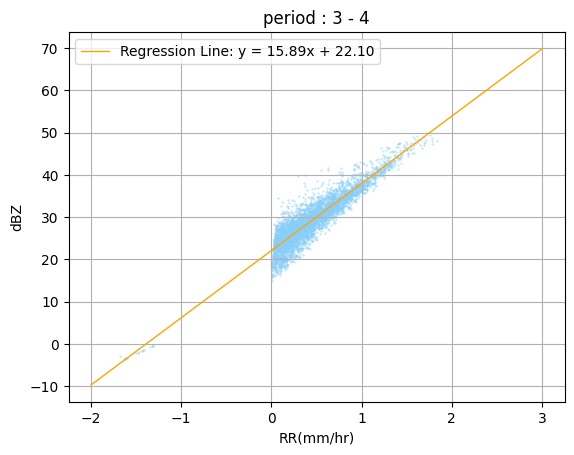

二次回歸
sr = 26159.47993284585 
se = 2.410258257174346 
r = 0.919541480932936
Polynomial regression Line: y = -0.29x^2 + 16.18x + 22.07


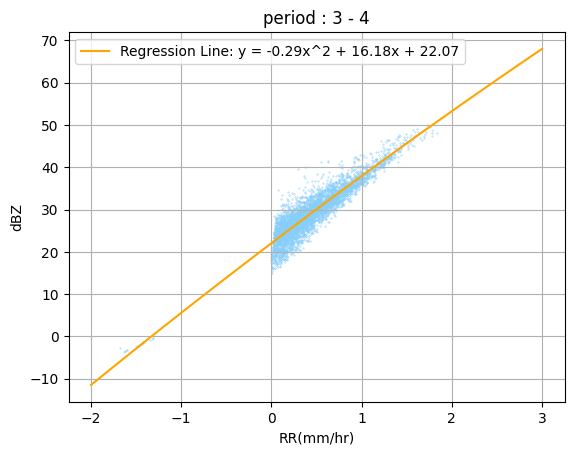

se =  2.411463327416273 
r_exp =  0.9194388116789118
exponential regresssion: y = 3970949318.00e^ 15.89x


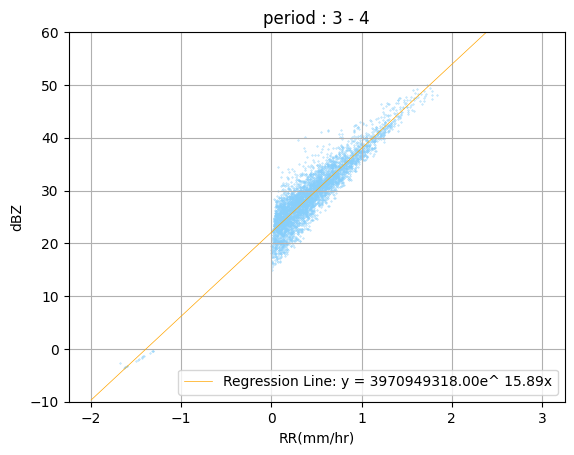

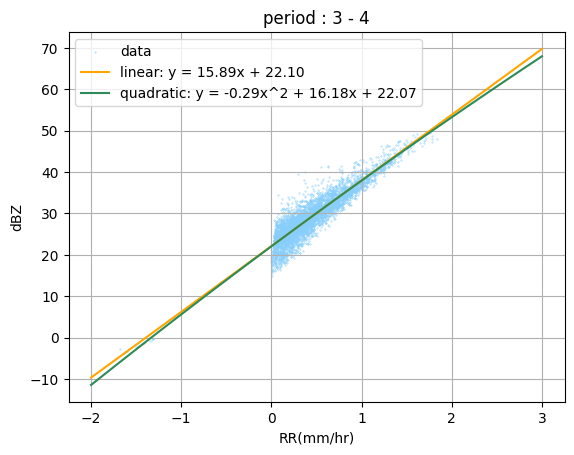

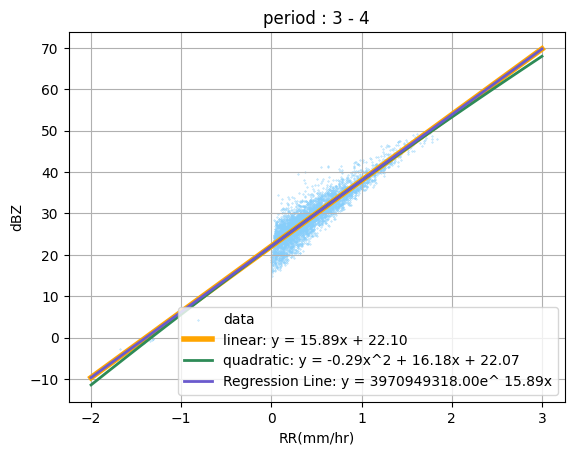

            li_er  li_er_max    qua_er  qua_er_max    exp_er  exp_er_max
3 - 4    1.873994   9.845533  1.871736    9.846699  1.873994    9.845533
5 - 6    1.993839  15.050014  1.972454   16.070412  1.993839   15.050014
7 - 9    2.010362  11.647445  1.989396   11.634368  2.010362   11.647445
10 - 2   1.975982  10.353698  1.977086   10.377592  1.975982   10.353698
typhoon  1.742163   8.826340  1.724007    8.800165  1.742163    8.826340
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
period = 5 - 6
線性回歸
sr = 23038.715445967573 
se = 2.406560260845725 
r = 0.9313931216336739
Linear regression Line: y = 14.69x + 22.54
a= 179.5 b= 1.5


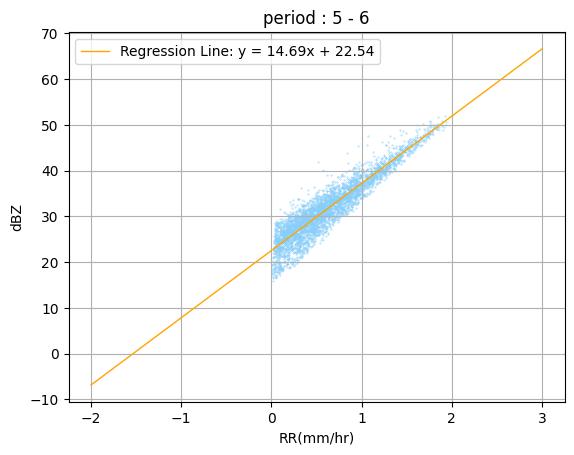

二次回歸
sr = 23038.560567590383 
se = 2.406854711466757 
r = 0.9313935998316513
Polynomial regression Line: y = 0.03x^2 + 14.65x + 22.55


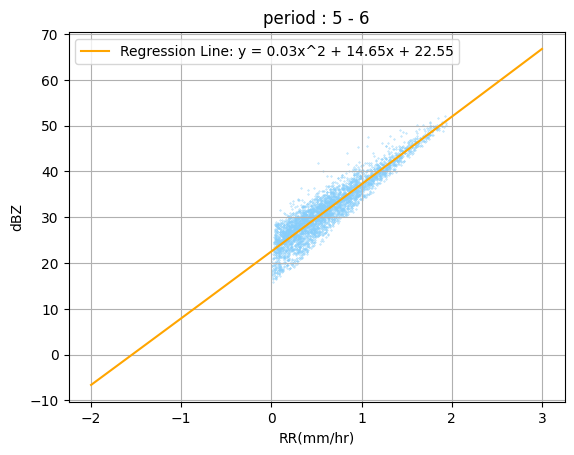

se =  2.406560260845727 
r_exp =  0.9313931216336738
exponential regresssion: y = 6151220594.61e^ 14.69x


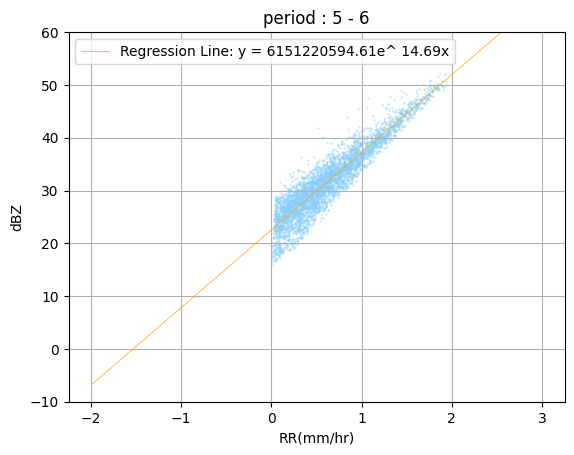

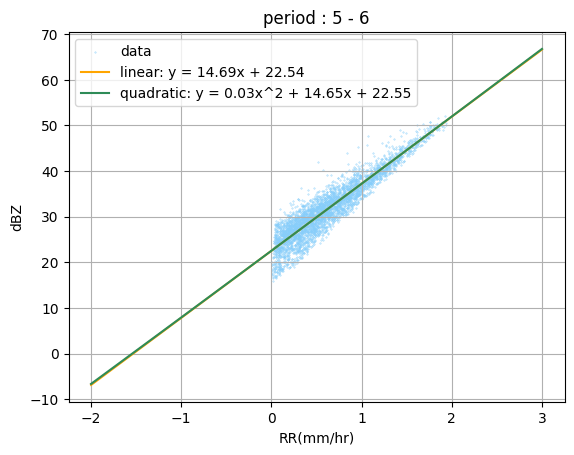

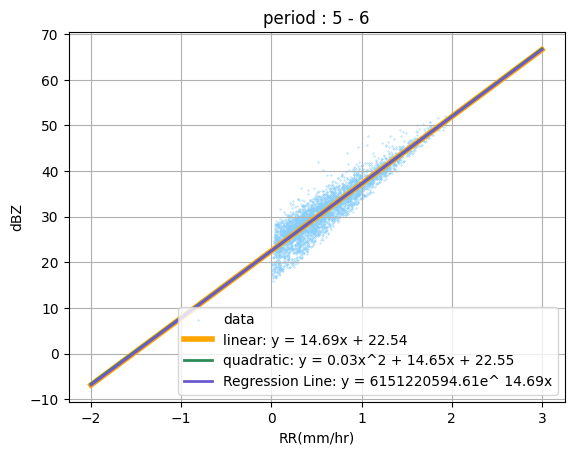

            li_er  li_er_max    qua_er  qua_er_max    exp_er  exp_er_max
3 - 4    1.882827   9.571160  1.883398    9.564501  1.882827    9.571160
5 - 6    1.877441  14.488237  1.877381   14.483721  1.877441   14.488237
7 - 9    1.980194  11.463712  1.980082   11.459852  1.980194   11.463712
10 - 2   1.969633   9.964881  1.970284    9.954191  1.969633    9.964881
typhoon  1.661244   8.755545  1.661555    8.754684  1.661244    8.755545
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
period = 7 - 9
線性回歸
sr = 12079.146535815691 
se = 2.4869497102162614 
r = 0.9229388724031345
Linear regression Line: y = 14.38x + 23.63
a= 230.9 b= 1.4


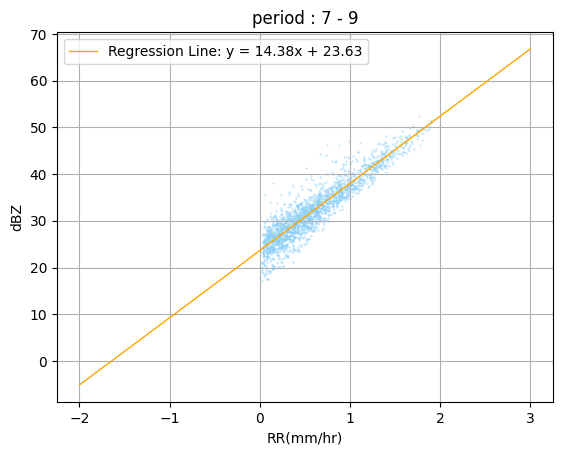

二次回歸
sr = 12074.186133266656 
se = 2.4870758281221 
r = 0.9229718387497543
Polynomial regression Line: y = -0.25x^2 + 14.76x + 23.54


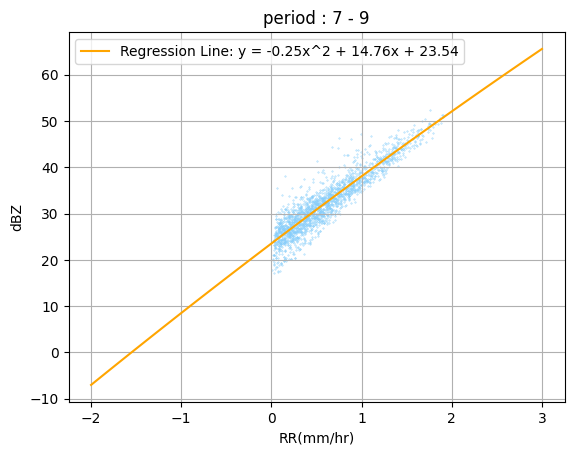

se =  2.4869497102162605 
r_exp =  0.9229388724031345
exponential regresssion: y = 18358909546.47e^ 14.38x


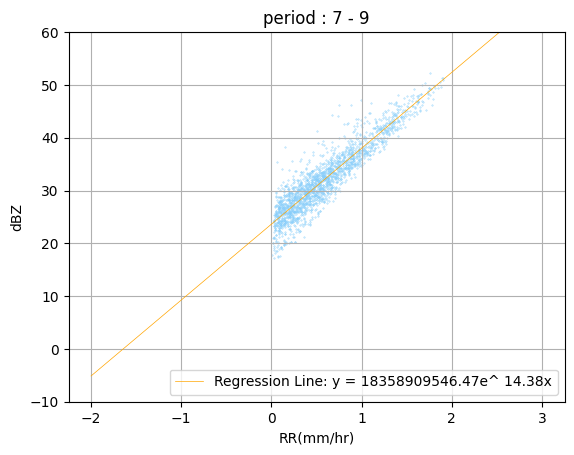

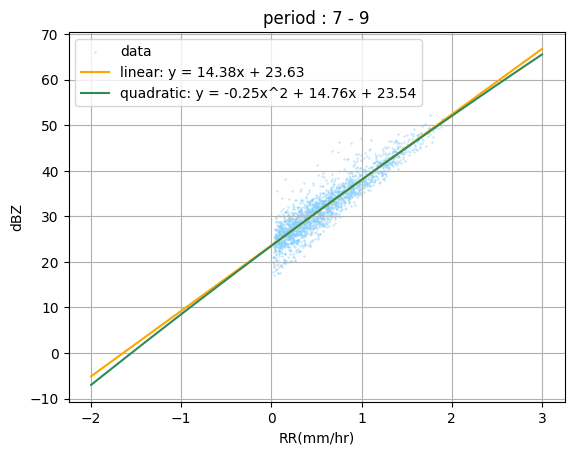

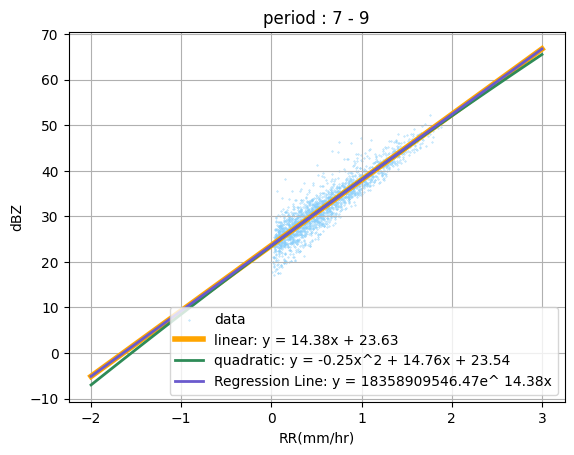

            li_er  li_er_max    qua_er  qua_er_max    exp_er  exp_er_max
3 - 4    1.956255   8.521105  1.953392    8.570394  1.956255    8.521105
5 - 6    1.980219  13.456353  1.980647   13.488283  1.980219   13.456353
7 - 9    1.812856  10.437756  1.811122   10.464381  1.812856   10.437756
10 - 2   2.328981   8.971726  2.325277    8.966466  2.328981    8.971726
typhoon  1.671328   7.759616  1.671721    7.762078  1.671328    7.759616
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
period = 10 - 2
線性回歸
sr = 42026.53976734968 
se = 2.396271063809663 
r = 0.8899860218903435
Linear regression Line: y = 16.01x + 21.33
a= 136.0 b= 1.6


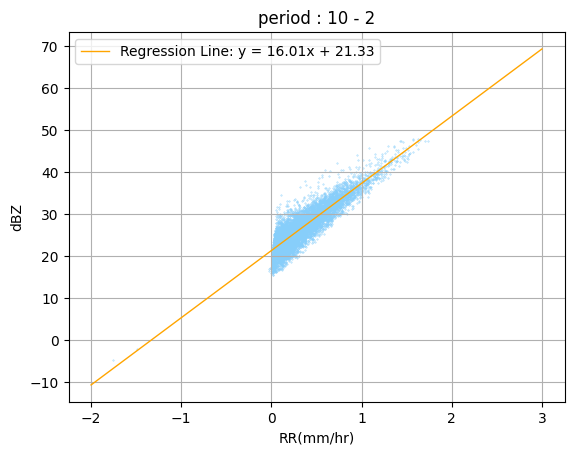

二次回歸
sr = 41960.2748383806 
se = 2.394544759989893 
r = 0.890170187464148
Polynomial regression Line: y = -0.68x^2 + 16.73x + 21.22


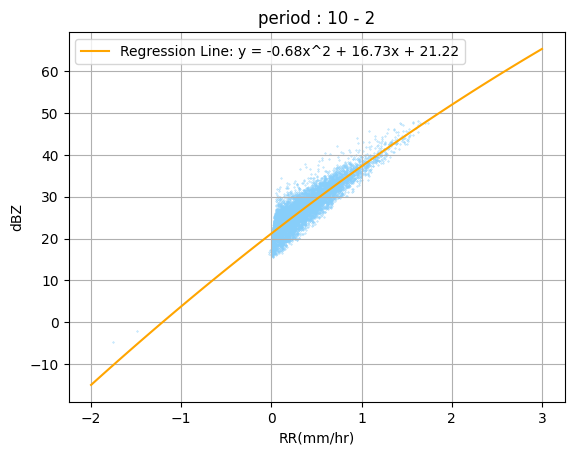

se =  2.3962710638096607 
r_exp =  0.8899860218903438
exponential regresssion: y = 1842654126.01e^ 16.01x


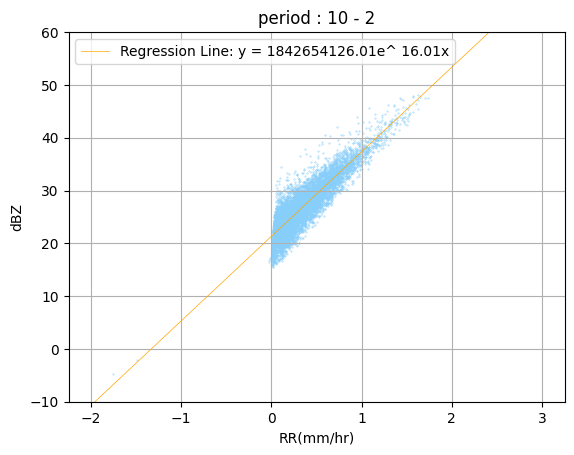

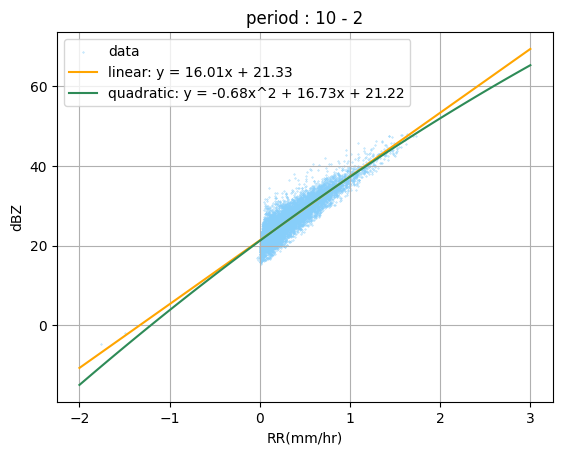

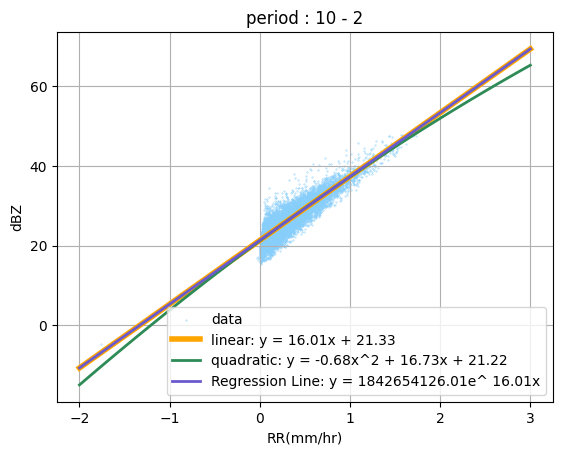

            li_er  li_er_max    qua_er  qua_er_max    exp_er  exp_er_max
3 - 4    2.001372  10.597128  2.000978   10.630141  2.001372   10.597128
5 - 6    1.988309  15.985501  1.960058   18.464775  1.988309   15.985501
7 - 9    2.247359  12.390045  2.227852   12.386822  2.247359   12.390045
10 - 2   1.887444  11.116650  1.887596   11.206528  1.887444   11.116650
typhoon  1.861762   9.557733  1.834253    9.520248  1.861762    9.557733
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
period = typhoon
線性回歸
sr = 13432.83326959701 
se = 2.084992861589529 
r = 0.9352083019245654
Linear regression Line: y = 14.22x + 23.22
a= 209.8 b= 1.4


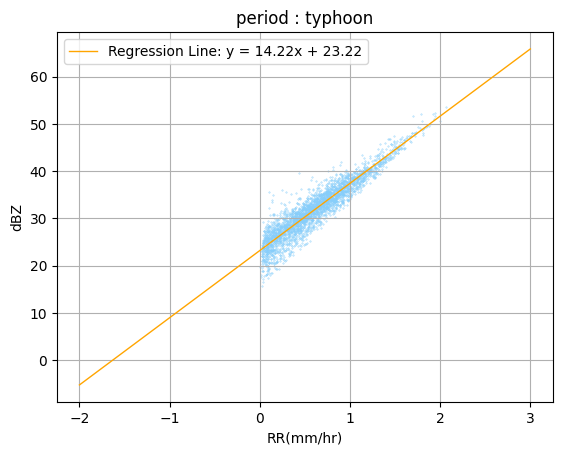

二次回歸
sr = 13419.158097740308 
se = 2.0842685750535486 
r = 0.9352765449158568
Polynomial regression Line: y = -0.35x^2 + 14.73x + 23.09


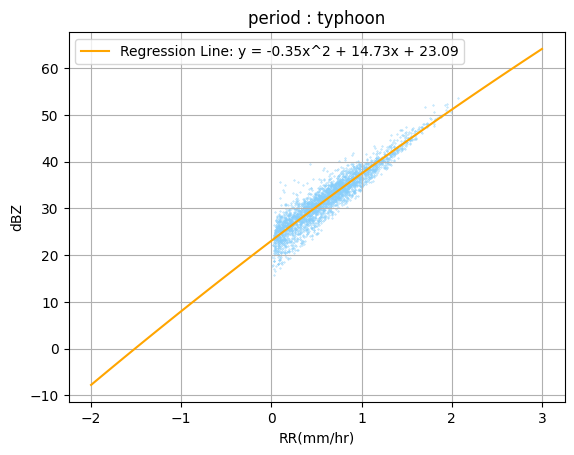

se =  2.0849928615895275 
r_exp =  0.9352083019245654
exponential regresssion: y = 12112295356.65e^ 14.22x


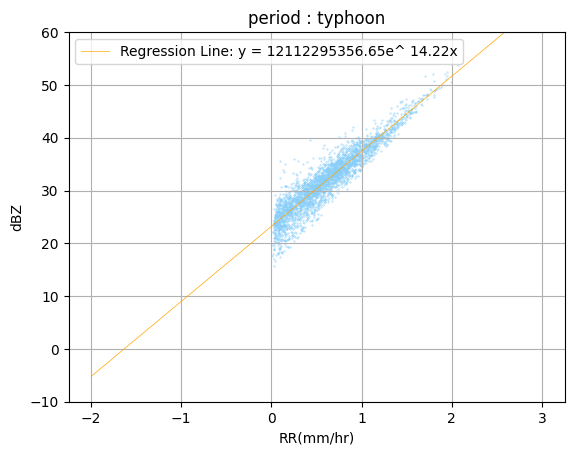

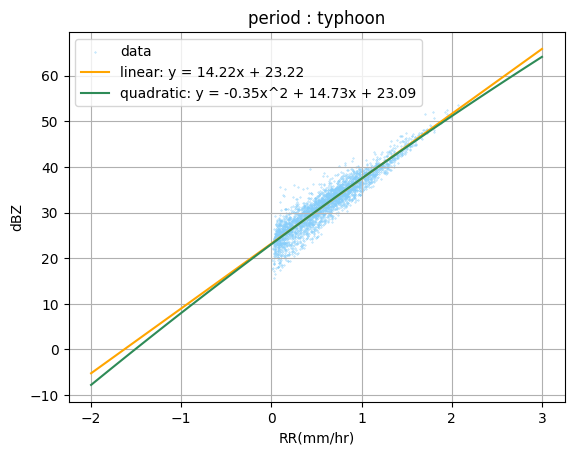

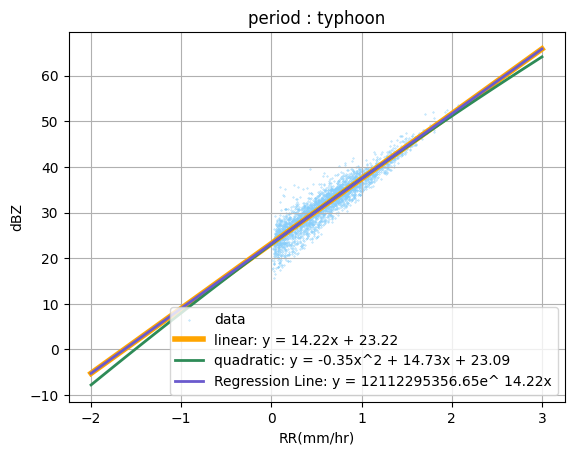

            li_er  li_er_max    qua_er  qua_er_max    exp_er  exp_er_max
3 - 4    1.888482   8.958734  1.883533    9.025939  1.888482    8.958734
5 - 6    1.881734  13.903081  1.887736   13.947623  1.881734   13.903081
7 - 9    1.869429  10.887452  1.872222   10.925094  1.869429   10.887452
10 - 2   2.120378   9.482292  2.112122    9.431829  2.120378    9.482292
typhoon  1.616180   8.224348  1.614907    8.230756  1.616180    8.224348
-------------------------------------------------------------------------------------------------------------


In [ ]:
t3_4, t5_6, t7_9, t10_2 = [], [], [], []
x3_4, x5_6, x7_9, x10_2 = [], [], [], []
y3_4, y5_6, y7_9, y10_2 = [], [], [], []
t_list = [t3_4, t5_6, t7_9, t10_2]
x_list = [x3_4, x5_6, x7_9, x10_2]
y_list = [y3_4, y5_6, y7_9, y10_2]
ind_list = [ind3_4, ind5_6, ind7_9, ind10_2]

# sep month
for i in range(len(ind_list)):
    iii = ind_list[i]
    # print(iii)
    t_list[i] = np.delete(t_not_ty, ind_list[i])
    x_list[i] = np.delete(x_not_ty, ind_list[i])
    y_list[i] = np.delete(y_not_ty, ind_list[i])

# month random
df_3_4 = pd.DataFrame({'time': t_list[0], 'x': x_list[0], 'y': y_list[0]})
df_5_6 = pd.DataFrame({'time': t_list[1], 'x': x_list[1], 'y': y_list[1]})
df_7_9 = pd.DataFrame({'time': t_list[2], 'x': x_list[2], 'y': y_list[2]})
df_10_2 = pd.DataFrame({'time': t_list[3], 'x': x_list[3], 'y': y_list[3]})

def random(dataframe):

    train_t_ty, test_t_ty = train_test_split(dataframe, random_state=777, train_size=0.7)
    train_t = train_t_ty.sort_index()
    test_t = test_t_ty.sort_index()

    t_train = np.array(train_t_ty['time'])
    x_train = np.array(train_t_ty['x'])
    y_train = np.array(train_t_ty['y'])

    t_test = np.array(test_t_ty['time'])
    x_test = np.array(test_t_ty['x'])
    y_test = np.array(test_t_ty['y'])
    return t_train, x_train, y_train, t_test, x_test, y_test

t_train_result_3_4, x_train_result_3_4, y_train_result_3_4, t_test_result_3_4, x_test_result_3_4, y_test_result_3_4 = random(df_3_4)
t_train_result_5_6, x_train_result_5_6, y_train_result_5_6, t_test_result_5_6, x_test_result_5_6, y_test_result_5_6 = random(df_5_6)
t_train_result_7_9, x_train_result_7_9, y_train_result_7_9, t_test_result_7_9, x_test_result_7_9, y_test_result_7_9 = random(df_7_9)
t_train_result_10_2, x_train_result_10_2, y_train_result_10_2, t_test_result_10_2, x_test_result_10_2, y_test_result_10_2 = random(df_10_2)

t_train = [t_train_result_3_4, t_train_result_5_6, t_train_result_7_9, t_train_result_10_2, t_ty_train]
x_train = [x_train_result_3_4, x_train_result_5_6, x_train_result_7_9, x_train_result_10_2, x_ty_train]
y_train = [y_train_result_3_4, y_train_result_5_6, y_train_result_7_9, y_train_result_10_2, y_ty_train]

t_test = [t_test_result_3_4, t_test_result_5_6, t_test_result_7_9, t_test_result_10_2, t_ty_test]
x_test = [x_test_result_3_4, x_test_result_5_6, x_test_result_7_9, x_test_result_10_2, x_ty_test]
y_test = [y_test_result_3_4, y_test_result_5_6, y_test_result_7_9, y_test_result_10_2, y_ty_test]

name = ['3 - 4', '5 - 6', '7 - 9', '10 - 2', 'typhoon']
for i in range(len(t_train)):
    print('-------------------------------------------------------------------------------------------------------------')
    print('period =', name[i])
    run(i, x_train[i], y_train[i], t_train[i], name, x_test, y_test, t_test)
    print('-------------------------------------------------------------------------------------------------------------')

In [ ]:
print('TY')
convertAB(14.24, 23.20)

print('3-4')
convertAB(15.86, 22.16)

print('5-6')
convertAB(14.68, 22.56)

print('7-9')
convertAB(14.32, 23.70)

print('10-2')
convertAB(16.01, 21.34)

TY
a= 208.9 b= 1.4
3-4
a= 164.4 b= 1.6
5-6
a= 180.3 b= 1.5
7-9
a= 234.4 b= 1.4
10-2
a= 136.1 b= 1.6


In [2]:
#TY
a_ty= 208.9
b_ty= 1.4
#3-4
a_34= 164.4
b_34= 1.6
#5-6
a_56= 180.3
b_56= 1.5
#7-9
a_79= 234.4
b_79= 1.4
#10-2
a_102= 136.1
b_102= 1.6

dbz_in = float(input('Enter the dBZ:'))
z_not_real = 10**(dbz_in/10)

r_ty = (z_not_real/a_ty)**(1/b_ty)
r_34 = (z_not_real/a_34)**(1/b_34)
r_56 = (z_not_real/a_56)**(1/b_56)
r_79 = (z_not_real/a_79)**(1/b_79)
r_102 = (z_not_real/a_102)**(1/b_102)

print()
print("In each status, the rain-fall propotion is")
print("Typhoon:",r_ty)
print("Spring:",r_34)
print("Plum rain:",r_56)
print("Summer:",r_79)
print("Winter:",r_102)

Enter the dBZ:45

In each status, the rain-fall propotion is
Typhoon: 36.07337932546131
Spring: 26.764637565855413
Plum rain: 31.333062778710907
Summer: 33.224530447002266
Winter: 30.11886984585776
